# Age Recognition

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from hw_kernels import KernelizedRidgeRegression, SVR, RBF
from age_recognition import load_utkface_data, NaiveImageKernel, LBPKernel, plot_all_predictions, plot_error_distribution
import matplotlib.pyplot as plt

In [8]:
print("Loading UTKFace data...")
X, y = load_utkface_data('UTKFace', max_samples=7000)


Loading UTKFace data...


Processing images: 100%|██████████| 7000/7000 [00:38<00:00, 180.78it/s] 


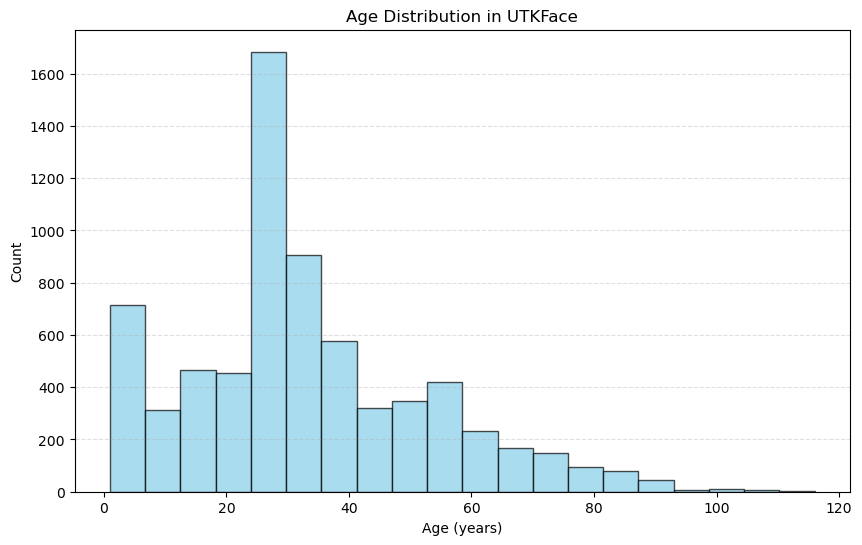

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution in UTKFace')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
kernels = {
    'Naive RBF': NaiveImageKernel(RBF(sigma=0.1)),
    'LBP': LBPKernel(sigma=0.1, radius=2, n_points=8)
}

models = {
    'Naive RBF SVR': SVR(kernels['Naive RBF'], lambda_=0.01, epsilon=0.5),
    'LBP SVR': SVR(kernels['LBP'], lambda_=0.01, epsilon=0.5)
}

print("\nTraining models...")
trained_models = {}
for name, model in models.items():
    print(f"- Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model



Training models...
- Training Naive RBF SVR...


Computing kernel: 100%|██████████| 1/1 [01:04<00:00, 64.64s/it]


     pcost       dcost       gap    pres   dres
 0: -1.6759e+06 -3.8886e+07  4e+07  3e-10  3e-16
 1: -4.3581e+06 -9.1221e+06  5e+06  4e-12  2e-16
 2: -6.5077e+06 -7.4194e+06  9e+05  2e-11  2e-16
 3: -6.8950e+06 -7.1848e+06  3e+05  2e-11  1e-16
 4: -7.0080e+06 -7.1159e+06  1e+05  1e-11  1e-16
 5: -7.0511e+06 -7.0803e+06  3e+04  4e-11  1e-16
 6: -7.0671e+06 -7.0675e+06  3e+02  1e-11  1e-16
 7: -7.0673e+06 -7.0673e+06  4e+00  5e-11  1e-16
Optimal solution found.
- Training LBP SVR...


Computing Chi-Square kernel: 100%|██████████| 4900/4900 [00:02<00:00, 2385.76it/s]


     pcost       dcost       gap    pres   dres
 0: -1.0161e+06 -3.4464e+07  3e+07  8e-11  2e-12
 1: -3.0653e+06 -8.4085e+06  5e+06  2e-11  2e-12
 2: -4.7791e+06 -6.2977e+06  2e+06  5e-12  2e-12
 3: -5.2065e+06 -5.8753e+06  7e+05  6e-12  2e-12
 4: -5.4241e+06 -5.6387e+06  2e+05  2e-12  2e-12
 5: -5.4988e+06 -5.5631e+06  6e+04  5e-12  2e-12
 6: -5.5216e+06 -5.5393e+06  2e+04  5e-12  2e-12
 7: -5.5282e+06 -5.5323e+06  4e+03  9e-13  2e-12
 8: -5.5300e+06 -5.5303e+06  4e+02  2e-12  2e-12
 9: -5.5301e+06 -5.5302e+06  4e+01  5e-12  2e-12
10: -5.5301e+06 -5.5301e+06  1e+00  5e-13  2e-12
Optimal solution found.



Generating plots...


Computing Chi-Square kernel: 100%|██████████| 2100/2100 [00:00<00:00, 2614.35it/s]


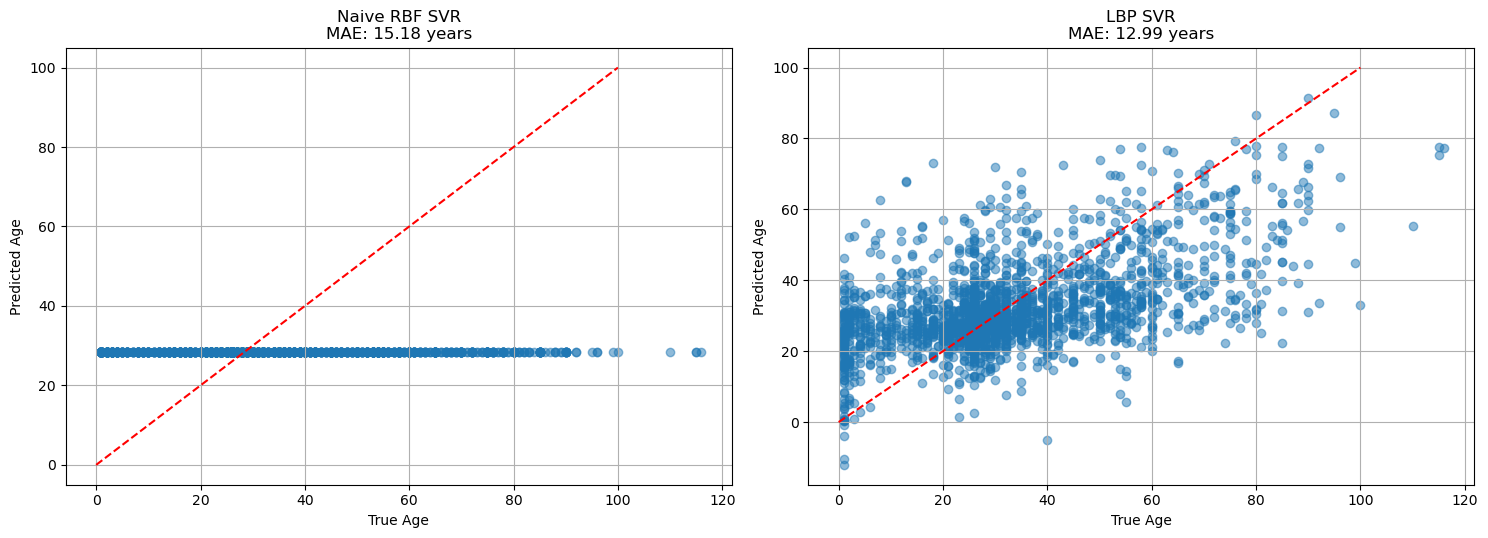

In [11]:
print("\nGenerating plots...")
plot_all_predictions(trained_models, X_test, y_test)

Computing Chi-Square kernel: 100%|██████████| 2100/2100 [00:02<00:00, 932.59it/s]


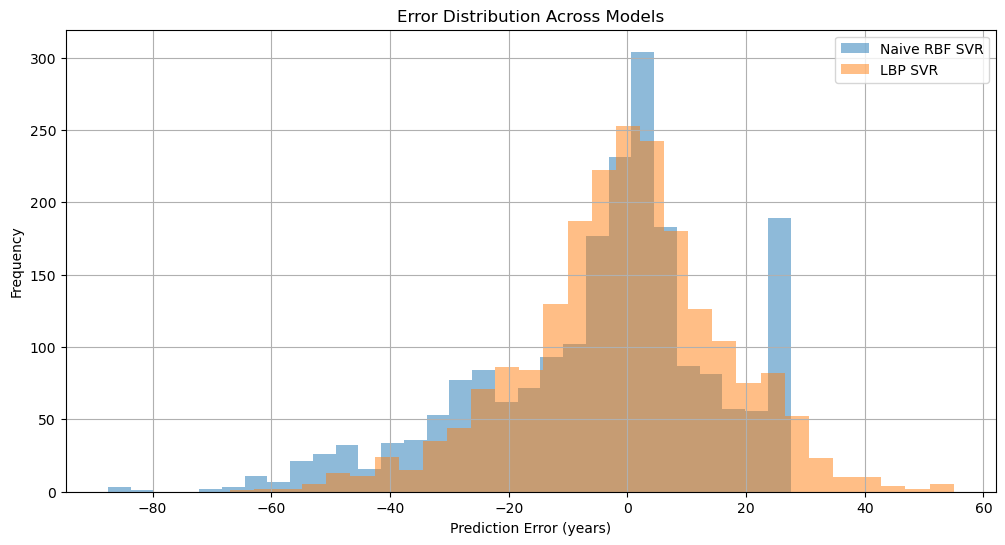

In [12]:
plot_error_distribution(trained_models, X_test, y_test)